In [12]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/processed/df_listo_para_eda_rango_intermedio.csv',sep=';')
df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta,1061.580205,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta,1061.580205,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,2103,Sierra Gorda,Resto región Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,70,Alta,1061.580205,3724.530431
3,1101,Iquique,11,Iquique,1,Tarapacá,2104,Taltal,Taltal,21,Antofagasta,2,Antofagasta,2019,1,enero,106,Alta,1061.580205,3724.530431
4,1101,Iquique,11,Iquique,1,Tarapacá,2301,Tocopilla,Tocopilla,23,Tocopilla,2,Antofagasta,2019,1,enero,457,Alta,1061.580205,3724.530431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488829,16305,San Nicolás,163,Punilla,16,Ñuble,16202,Cobquecura,Cobquecura,162,Itata,16,Ñuble,2023,12,diciembre,96,Alta,833.567298,833.567298
1488830,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2023,12,diciembre,17,Alta,833.567298,833.567298
1488831,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,108,Alta,833.567298,833.567298
1488832,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,47,Alta,833.567298,833.567298


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488834 entries, 0 to 1488833
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CUT Comuna Origen      1488834 non-null  int64  
 1   Comuna Origen          1488834 non-null  object 
 2   CUT Provincia Origen   1488834 non-null  int64  
 3   Provincia Origen       1488834 non-null  object 
 4   CUT Region Origen      1488834 non-null  int64  
 5   Region Origen          1488834 non-null  object 
 6   CUT Comuna Destino     1488834 non-null  int64  
 7   Comuna Destino         1488834 non-null  object 
 8   Destino Turistico      1488834 non-null  object 
 9   CUT Provincia Destino  1488834 non-null  int64  
 10  Provincia Destino      1488834 non-null  object 
 11  CUT Region Destino     1488834 non-null  int64  
 12  Region Destino         1488834 non-null  object 
 13  Anio                   1488834 non-null  int64  
 14  CUT Mes           

In [15]:
# Verificación de filas duplicadas
print(f'Filas Duplicadas: {df.duplicated().sum()}')

Filas Duplicadas: 0


In [16]:
# Verificación de NaNs
total_nan = df.isnull().sum().sum()
print("Total de NaN en el DataFrame:", total_nan)

Total de NaN en el DataFrame: 0


In [17]:
# Verificación de Nulos
df.isnull().sum().sort_values(ascending=False)

CUT Comuna Origen        0
Comuna Origen            0
PIB Region Origen        0
Temporada                0
Viajes Ocasionales       0
Mes                      0
CUT Mes                  0
Anio                     0
Region Destino           0
CUT Region Destino       0
Provincia Destino        0
CUT Provincia Destino    0
Destino Turistico        0
Comuna Destino           0
CUT Comuna Destino       0
Region Origen            0
CUT Region Origen        0
Provincia Origen         0
CUT Provincia Origen     0
PIB Region Destino       0
dtype: int64

In [18]:
# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Columnas categóricas:", categorical_cols)
print("Cantidad de Columnas categóricas: ", len(categorical_cols))
print("Columnas numéricas:", numerical_cols)
print("Cantidad de Columnas numéricas: ", len(numerical_cols))

Columnas categóricas: ['Comuna Origen', 'Provincia Origen', 'Region Origen', 'Comuna Destino', 'Destino Turistico', 'Provincia Destino', 'Region Destino', 'Mes', 'Temporada']
Cantidad de Columnas categóricas:  9
Columnas numéricas: ['CUT Comuna Origen', 'CUT Provincia Origen', 'CUT Region Origen', 'CUT Comuna Destino', 'CUT Provincia Destino', 'CUT Region Destino', 'Anio', 'CUT Mes', 'Viajes Ocasionales', 'PIB Region Origen', 'PIB Region Destino']
Cantidad de Columnas numéricas:  11


In [19]:
# Analisis univariante Categorico.

# Funciones para visualizar mejor el gráfico
# Función para ajustar rotación y espacios de etiquetas del eje x

def ajustar_xticks(ax, step = 5, rotation = 90):
    labels = ax.get_xticks()
    ax.set_xticks(labels[::step])

    for label in ax.get_xticklabels():
        label.set_rotation(rotation)

# Función para etiquetar las 10 barras con los valores más altos

def resaltar_top_10(ax, data, column):
    top_10 = data[column].value_counts().nlargest(10)

# Añadir una nota en el gráfico para cada una de las 10 categorías
    for categoria, frecuencia in top_10.items():
        ax.annotate(f'{categoria}: {frecuencia}',
                    xy=(categoria, frecuencia),
                    xytext=(categoria, frecuencia * 1.1),
                    ha='center', color='red',
                    rotation=90,
                    arrowprops=dict(facecolor='red', arrowstyle="->"))

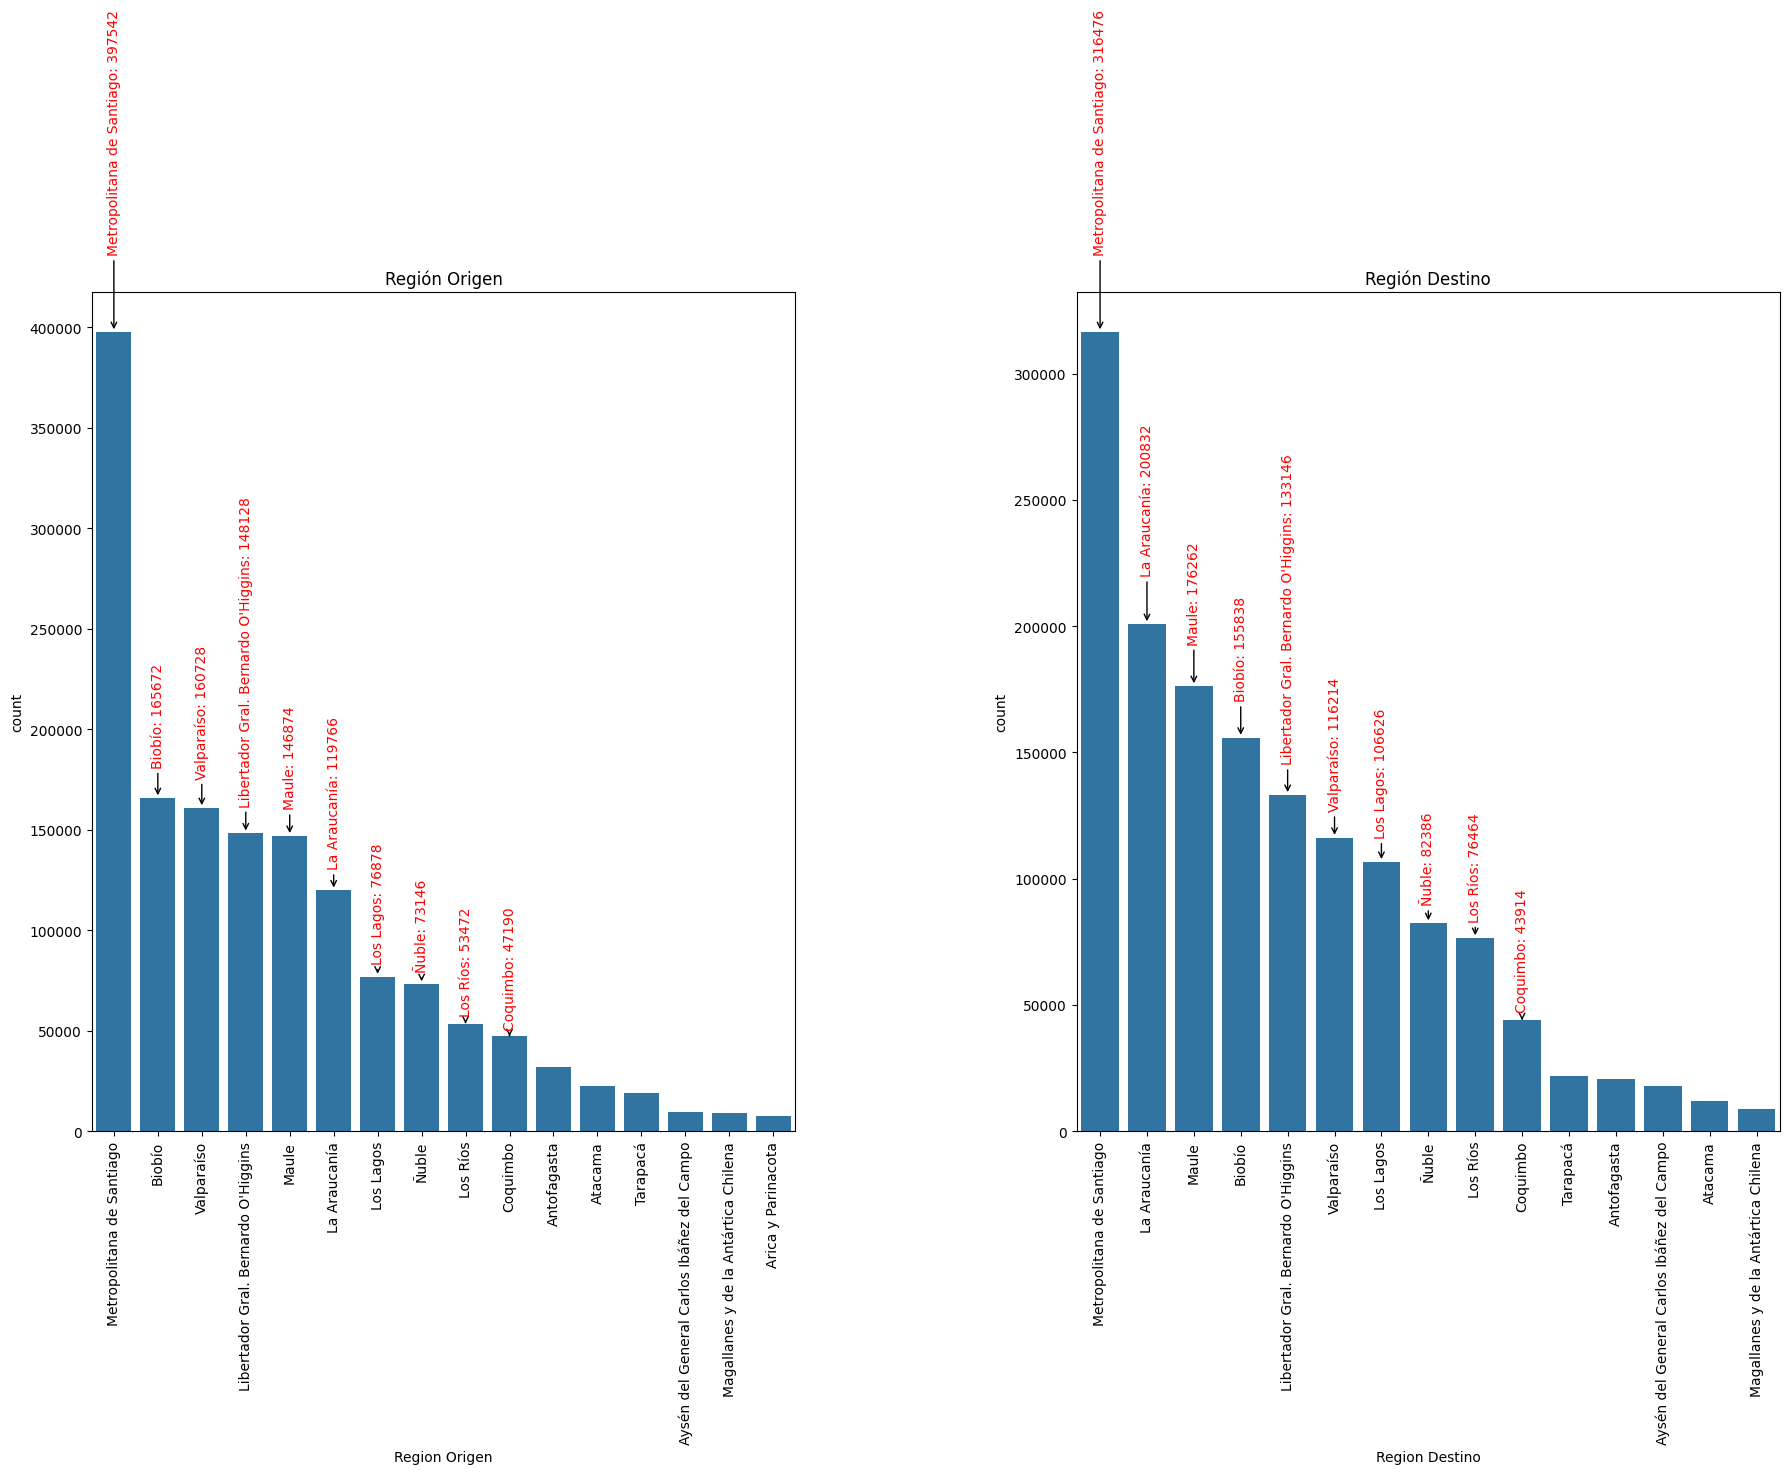

In [20]:
# Análisis univariante categórico: Regiones

fig, axes = plt.subplots(1, 2, figsize=(18, 15)) 

# Región Origen
sns.countplot(ax=axes[0], data=df, x="Region Origen", order=df["Region Origen"].value_counts().index)
axes[0].set_title("Región Origen")
resaltar_top_10(axes[0], df, "Region Origen")
ajustar_xticks(axes[0], step=1)

# Región Destino
sns.countplot(ax=axes[1], data=df, x="Region Destino", order=df["Region Destino"].value_counts().index)
axes[1].set_title("Región Destino")
resaltar_top_10(axes[1], df, "Region Destino")
ajustar_xticks(axes[1], step=1)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

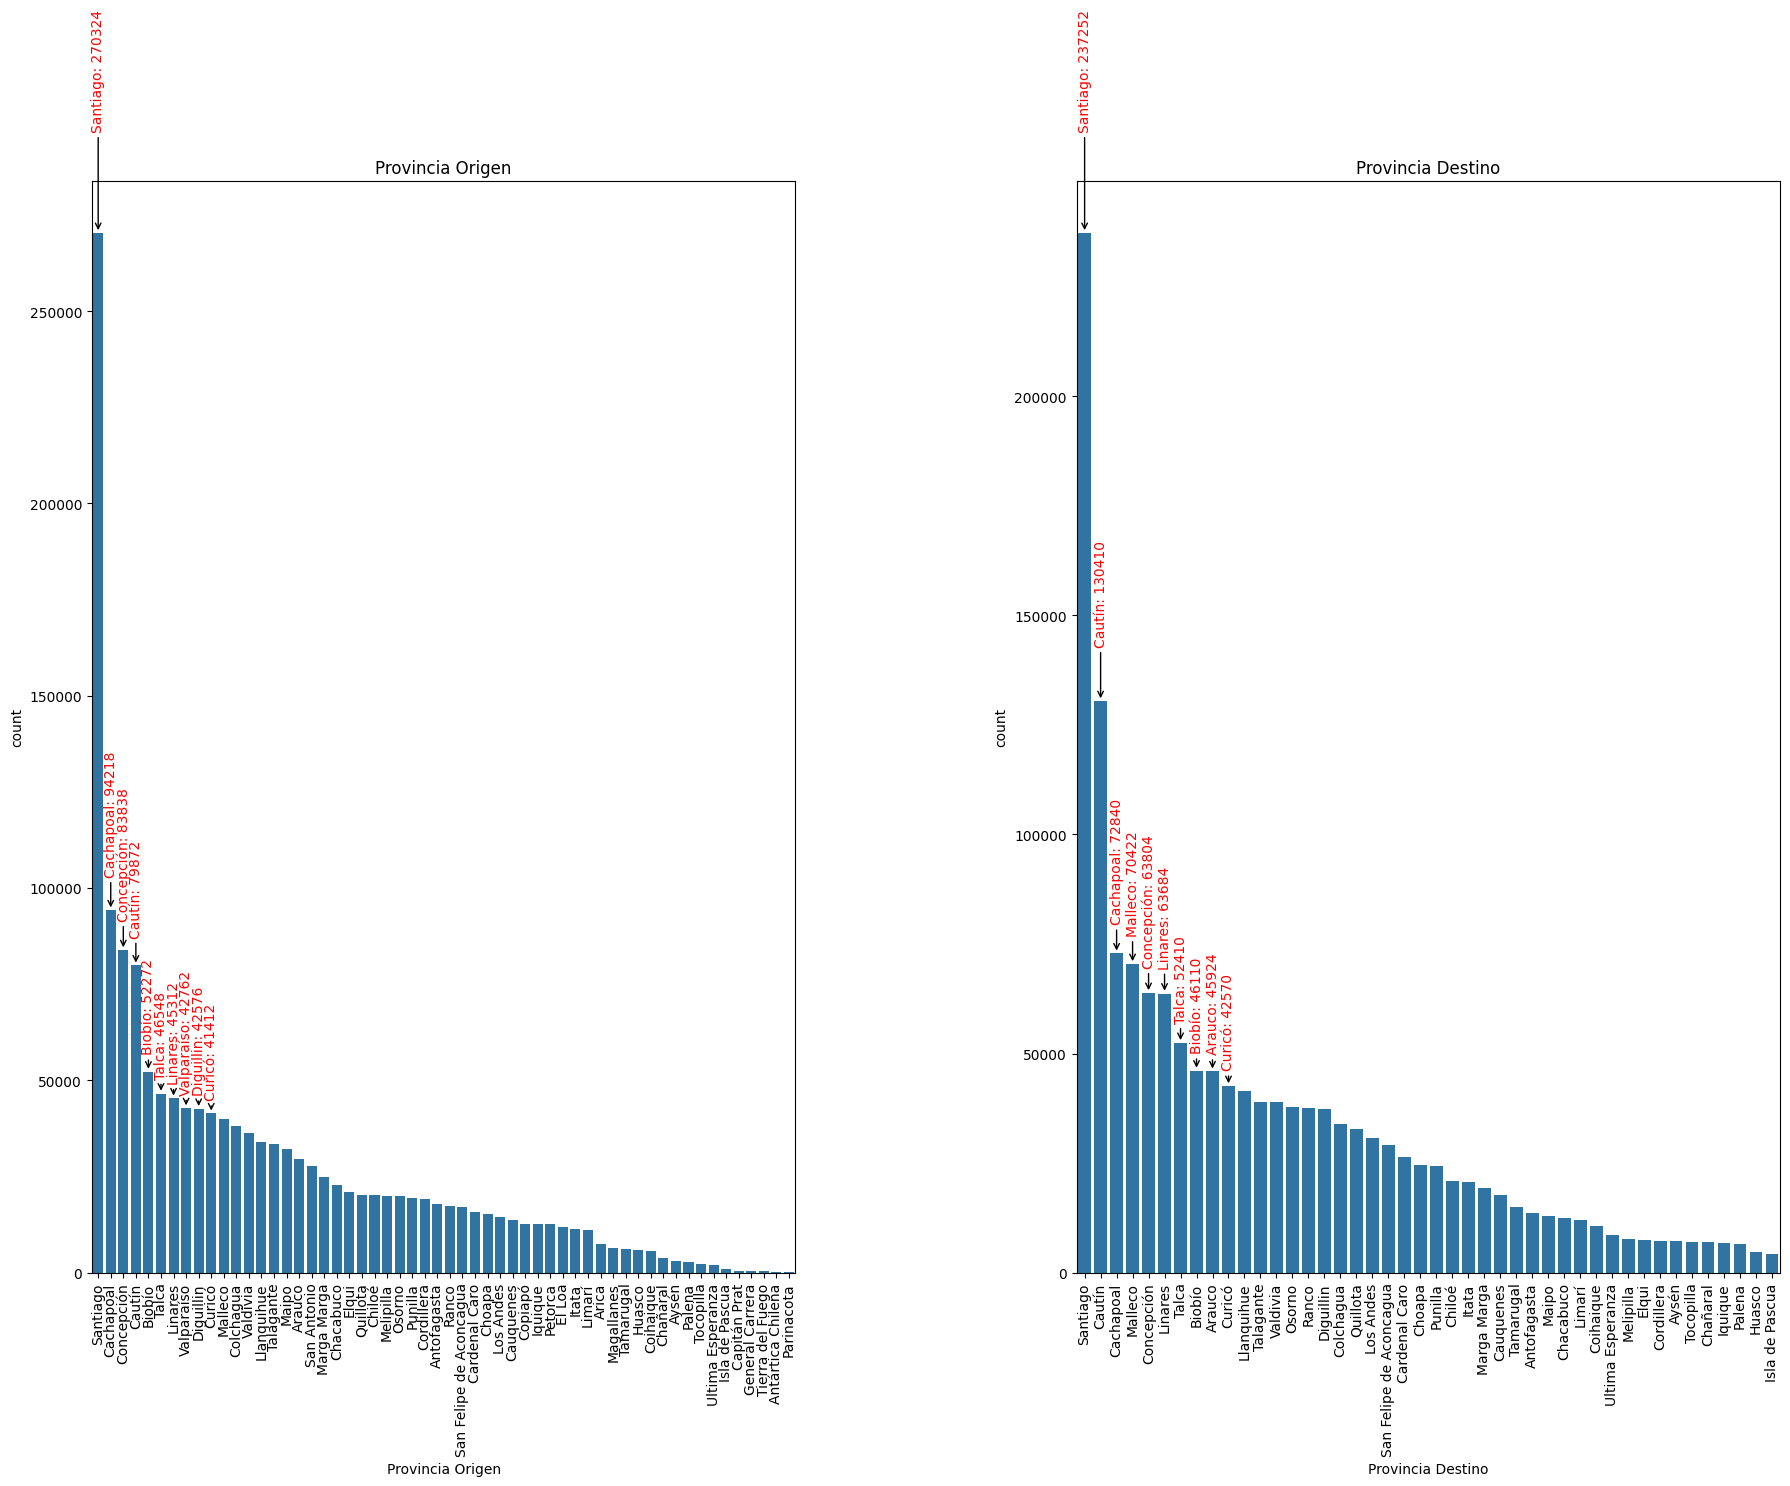

In [21]:
# Análisis univariante categórico: Provincias

fig, axes = plt.subplots(1, 2, figsize=(18, 15)) 

# Provincia Origen
sns.countplot(ax=axes[0], data=df, x="Provincia Origen", order=df["Provincia Origen"].value_counts().index)
axes[0].set_title("Provincia Origen")
resaltar_top_10(axes[0], df, "Provincia Origen")
ajustar_xticks(axes[0], step=1)

# Provincia Destino
sns.countplot(ax=axes[1], data=df, x="Provincia Destino", order=df["Provincia Destino"].value_counts().index)
axes[1].set_title("Provincia Destino")
resaltar_top_10(axes[1], df, "Provincia Destino")
ajustar_xticks(axes[1], step=1)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

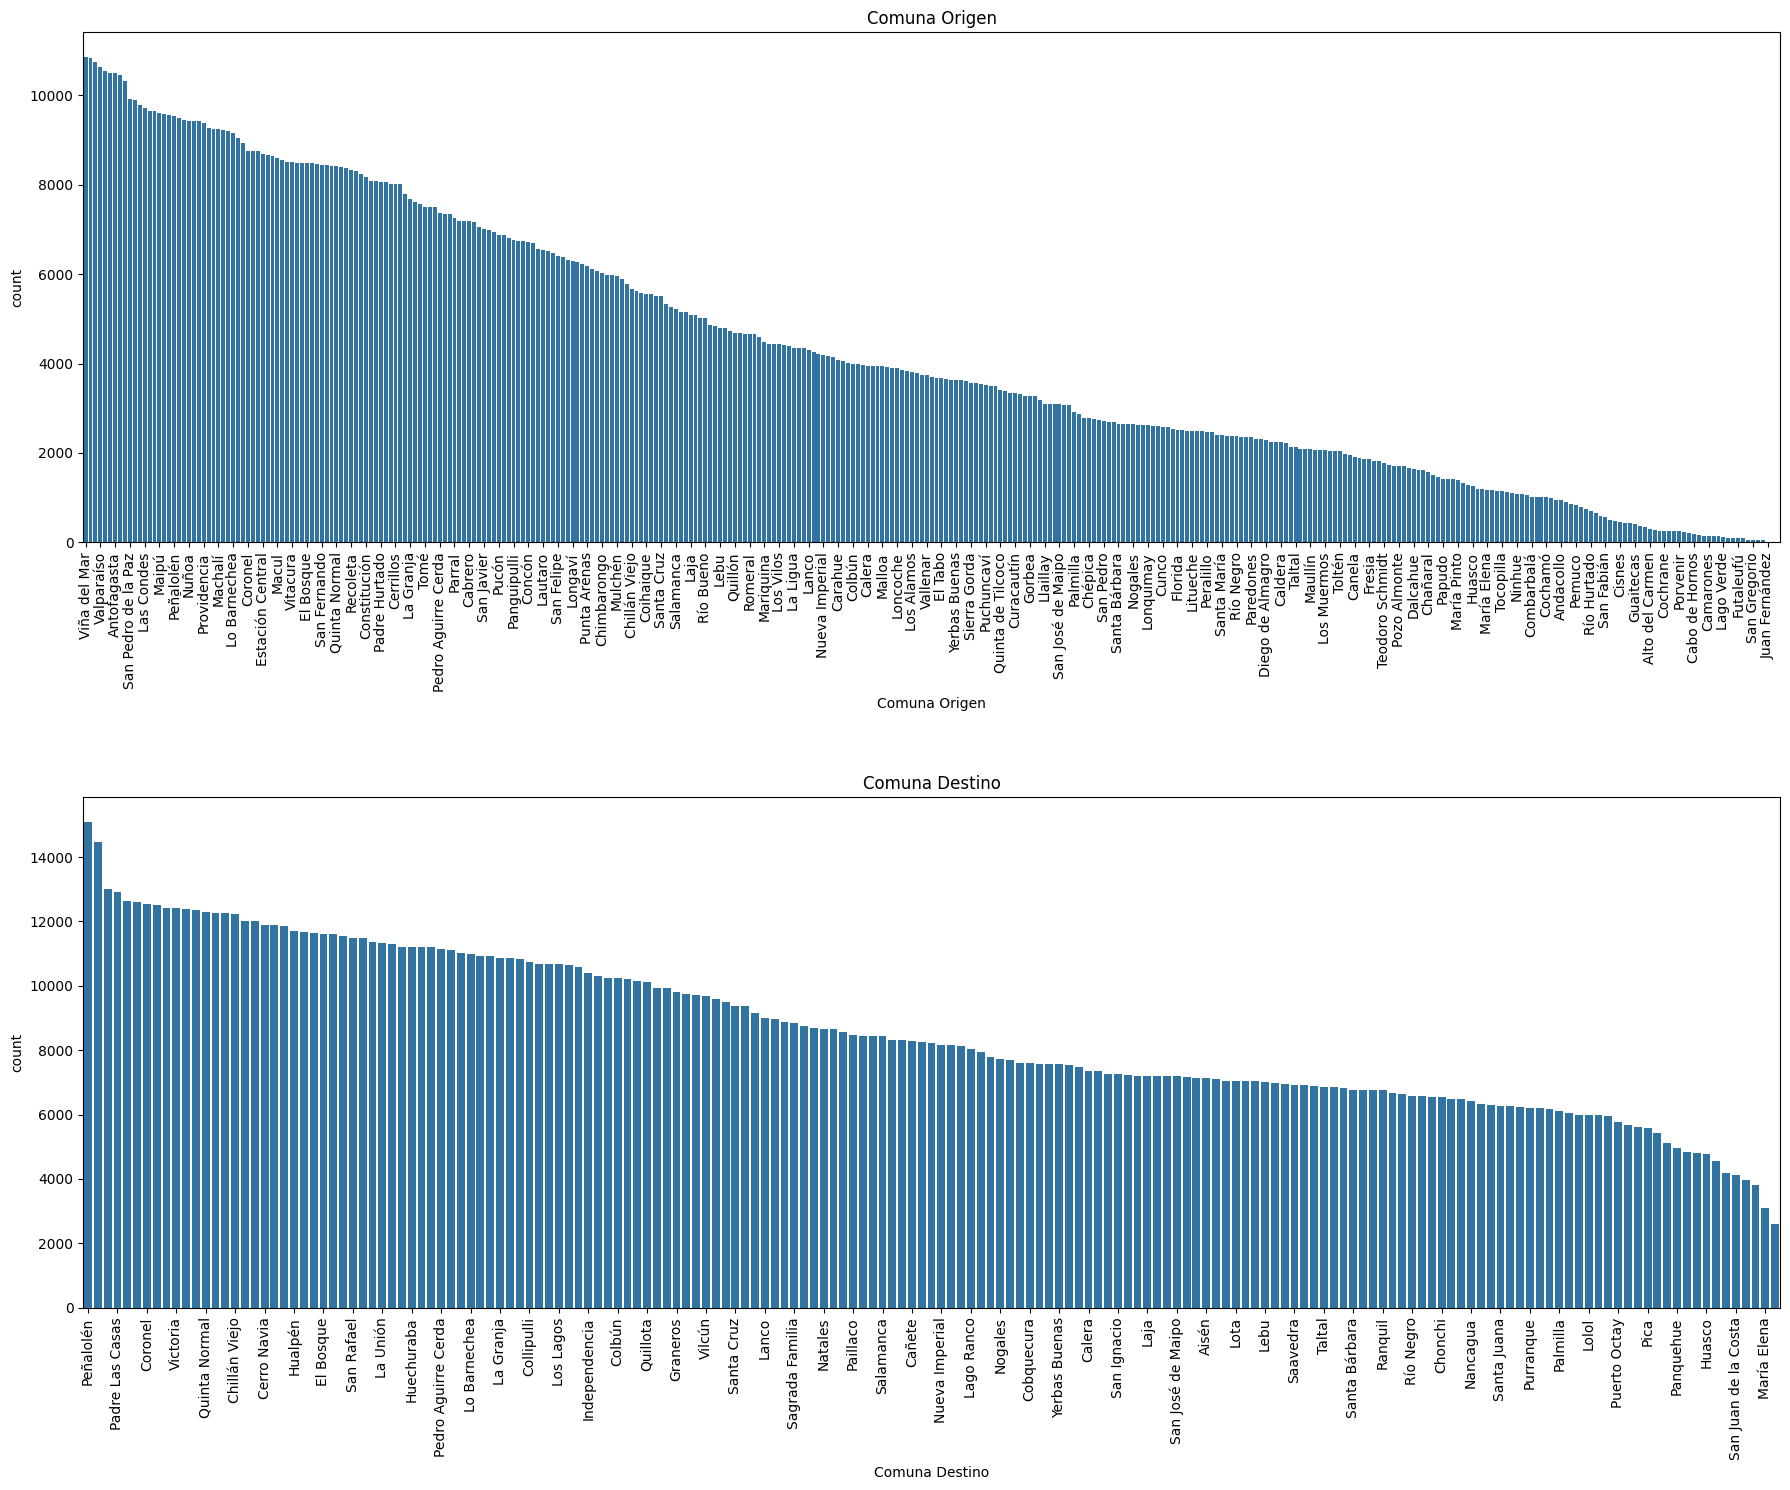

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(18, 15)) 

# Comuna Origen
sns.countplot(ax=axes[0], data=df, x="Comuna Origen", order=df["Comuna Origen"].value_counts().index)
axes[0].set_title("Comuna Origen")
ajustar_xticks(axes[0], step=3, rotation=90) 

# Comuna Destino
sns.countplot(ax=axes[1], data=df, x="Comuna Destino", order=df["Comuna Destino"].value_counts().index)
axes[1].set_title("Comuna Destino")
ajustar_xticks(axes[1], step=3, rotation=90)  

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Ajustar espacio entre las filas

plt.show()


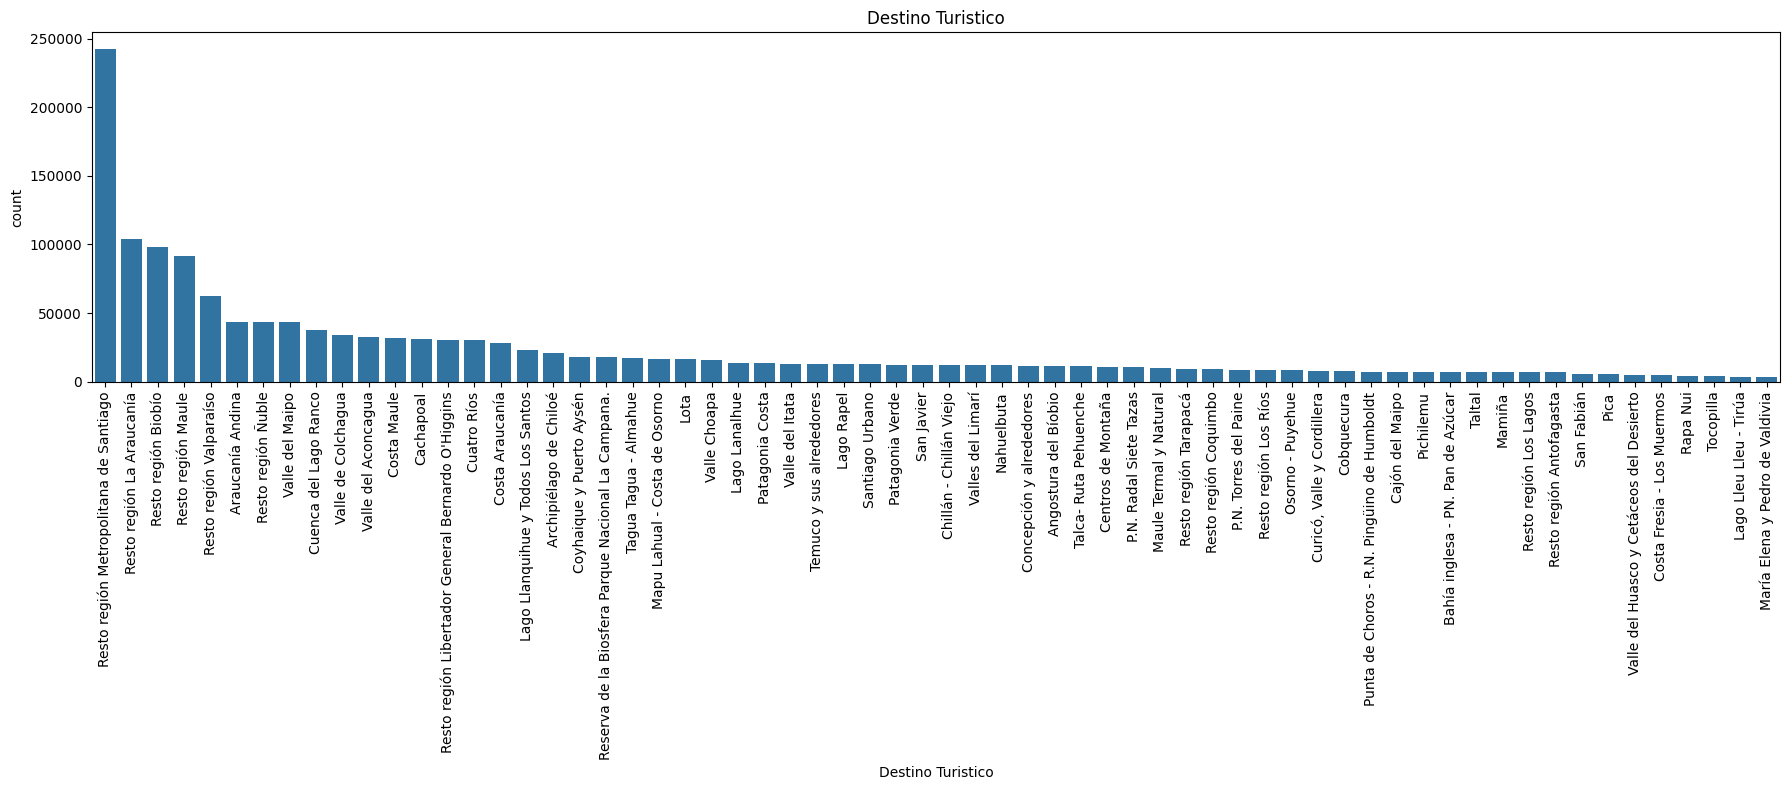

In [23]:
plt.figure(figsize=(18, 8))

# Destino Turistico
sns.countplot(data=df, x="Destino Turistico", order=df["Destino Turistico"].value_counts().index)
plt.title("Destino Turistico")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

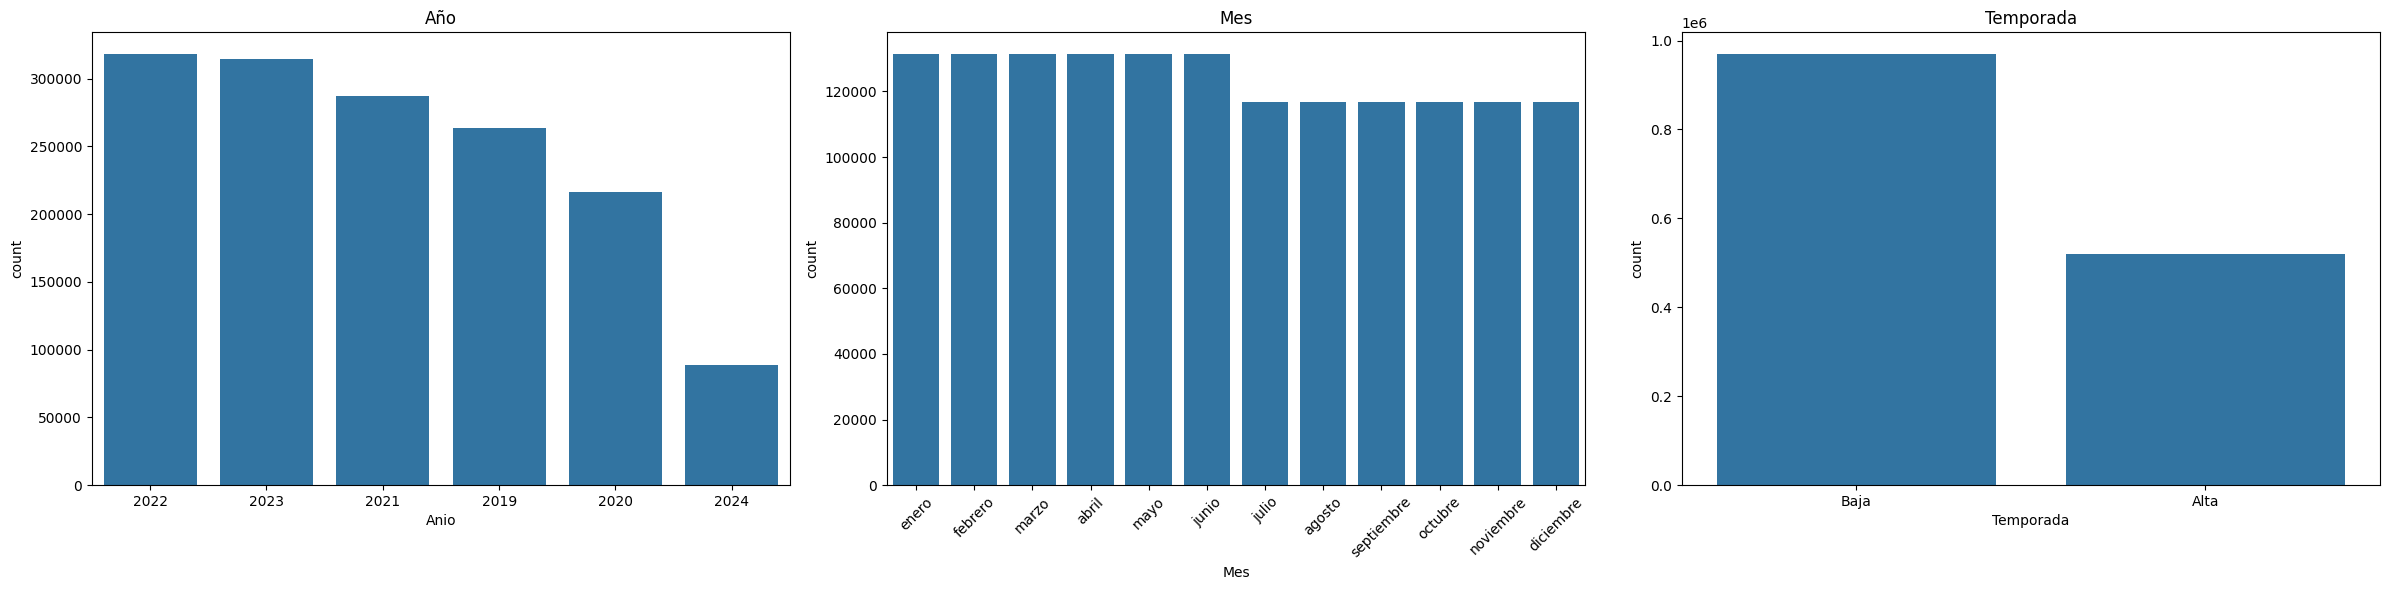

In [24]:

fig, axes = plt.subplots(1, 3, figsize=(24, 6)) 

# Gráfico del Año
sns.countplot(ax=axes[0], data=df, x="Anio", order=df["Anio"].value_counts().index)
axes[0].set_title("Año")

# Gráfico del Mes
sns.countplot(ax=axes[1], data=df, x="Mes", order=df["Mes"].value_counts().index)
axes[1].set_title("Mes")
ajustar_xticks(axes[1], step=1, rotation=45) 

# Gráfico de la Temporada
sns.countplot(ax=axes[2], data=df, x="Temporada", order=df["Temporada"].value_counts().index)
axes[2].set_title("Temporada")

plt.tight_layout()
plt.show()


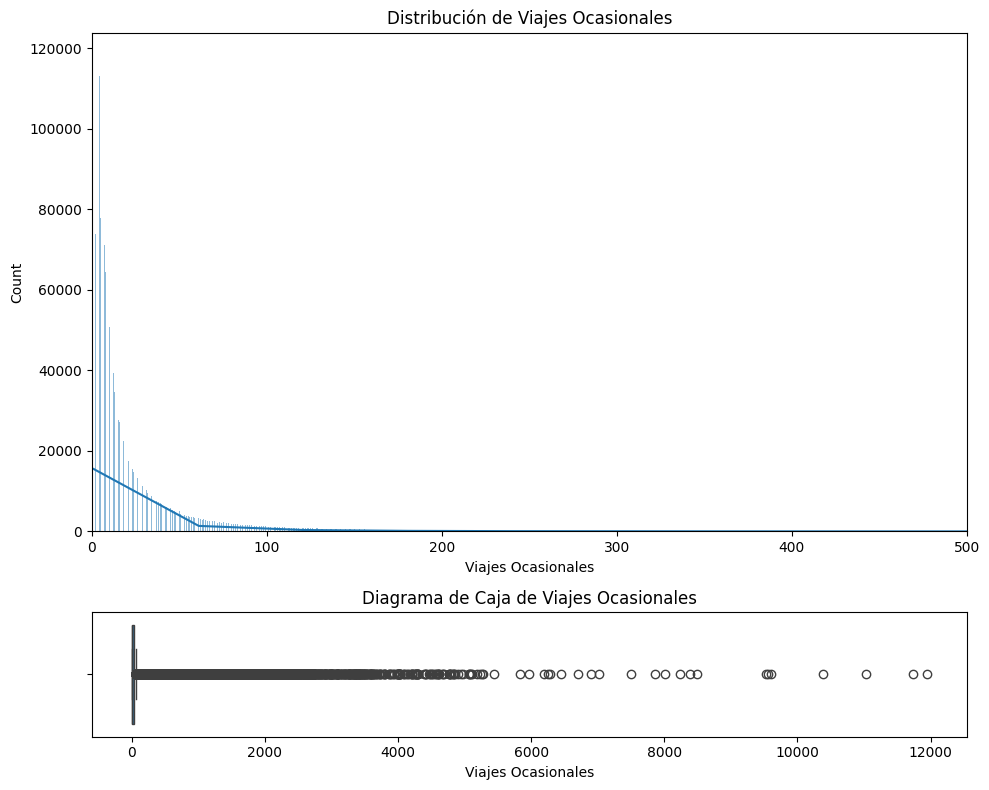

In [25]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=df, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")
ax_hist.set_xlim(0, 500)  # Ajusta el límite del eje X

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=df, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()



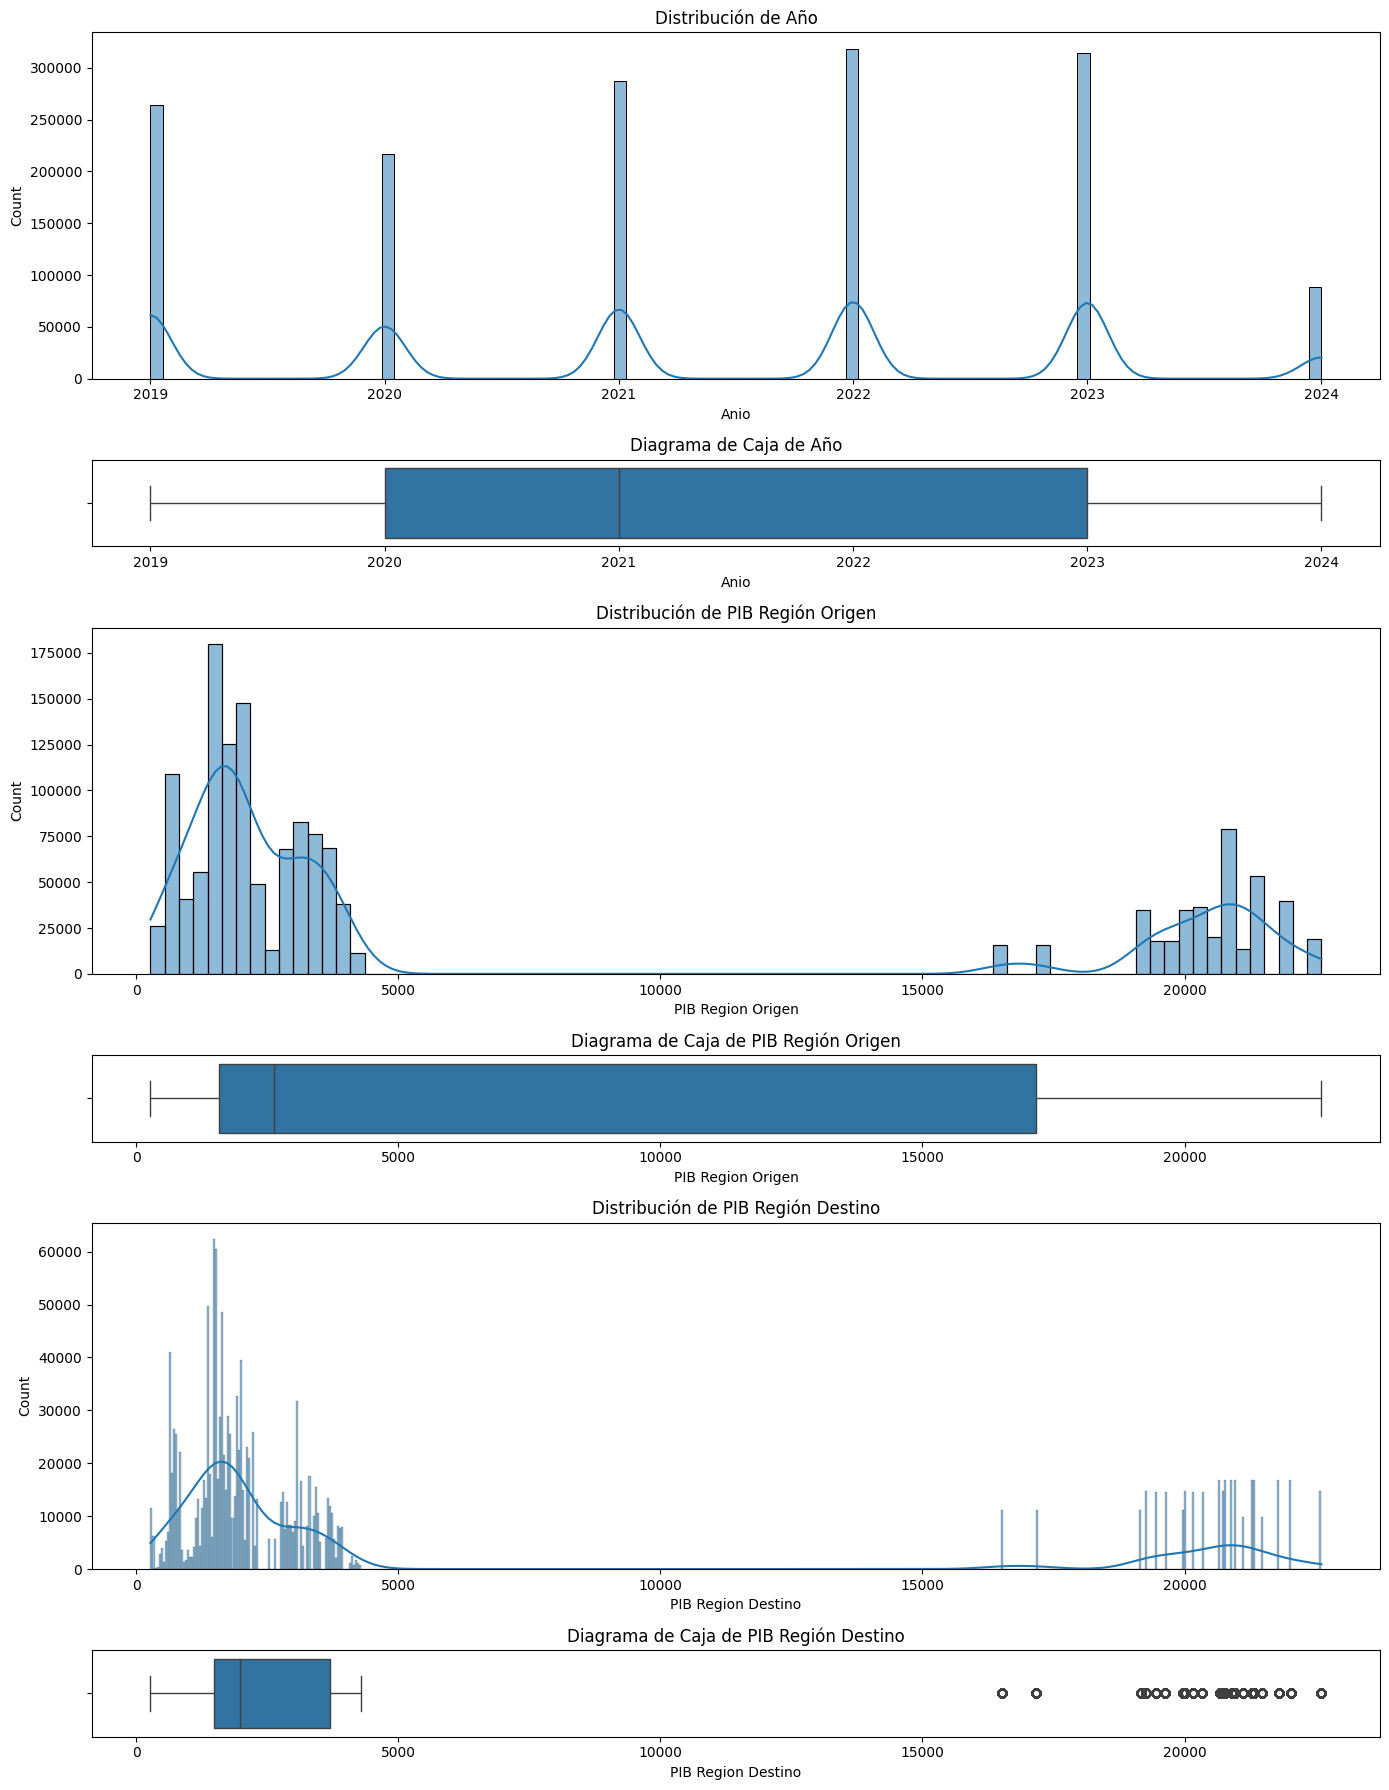

In [26]:
# Analisis univariante Año, PIB

fig, axis = plt.subplots(6, 1, figsize=(14, 18), gridspec_kw={'height_ratios': [4, 1, 4, 1, 4, 1]})

# Histograma y diagrama de caja para Año
sns.histplot(ax=axis[0], data=df, x="Anio", kde=True)
axis[0].set_title("Distribución de Año")
sns.boxplot(ax=axis[1], data=df, x="Anio")
axis[1].set_title("Diagrama de Caja de Año")

# Histograma y diagrama de caja para PIB Región Origen
sns.histplot(ax=axis[2], data=df, x="PIB Region Origen", kde=True)
axis[2].set_title("Distribución de PIB Región Origen")
sns.boxplot(ax=axis[3], data=df, x="PIB Region Origen")
axis[3].set_title("Diagrama de Caja de PIB Región Origen")

# Histograma y diagrama de caja para PIB Región Destino
sns.histplot(ax=axis[4], data=df, x="PIB Region Destino", kde=True)
axis[4].set_title("Distribución de PIB Región Destino")
sns.boxplot(ax=axis[5], data=df, x="PIB Region Destino")
axis[5].set_title("Diagrama de Caja de PIB Región Destino")


plt.tight_layout()
plt.show()
